In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных из CSV-файла
df = pd.read_csv('data/airline_passenger_satisfaction.csv')
df.head()


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Смотрим на распределение уровня удовлетворенности по процессам в зависимости от оценок по шкале от 0 до 5.

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Flight Distance'}>,
        <AxesSubplot: title={'center': 'Departure Delay'}>],
       [<AxesSubplot: title={'center': 'Arrival Delay'}>,
        <AxesSubplot: title={'center': 'Departure and Arrival Time Convenience'}>,
        <AxesSubplot: title={'center': 'Ease of Online Booking'}>,
        <AxesSubplot: title={'center': 'Check-in Service'}>],
       [<AxesSubplot: title={'center': 'Online Boarding'}>,
        <AxesSubplot: title={'center': 'Gate Location'}>,
        <AxesSubplot: title={'center': 'On-board Service'}>,
        <AxesSubplot: title={'center': 'Seat Comfort'}>],
       [<AxesSubplot: title={'center': 'Leg Room Service'}>,
        <AxesSubplot: title={'center': 'Cleanliness'}>,
        <AxesSubplot: title={'center': 'Food and Drink'}>,
        <AxesSubplot: title={'center': 'In-flight Service'}>],
       [<AxesSubplot: title={'center':

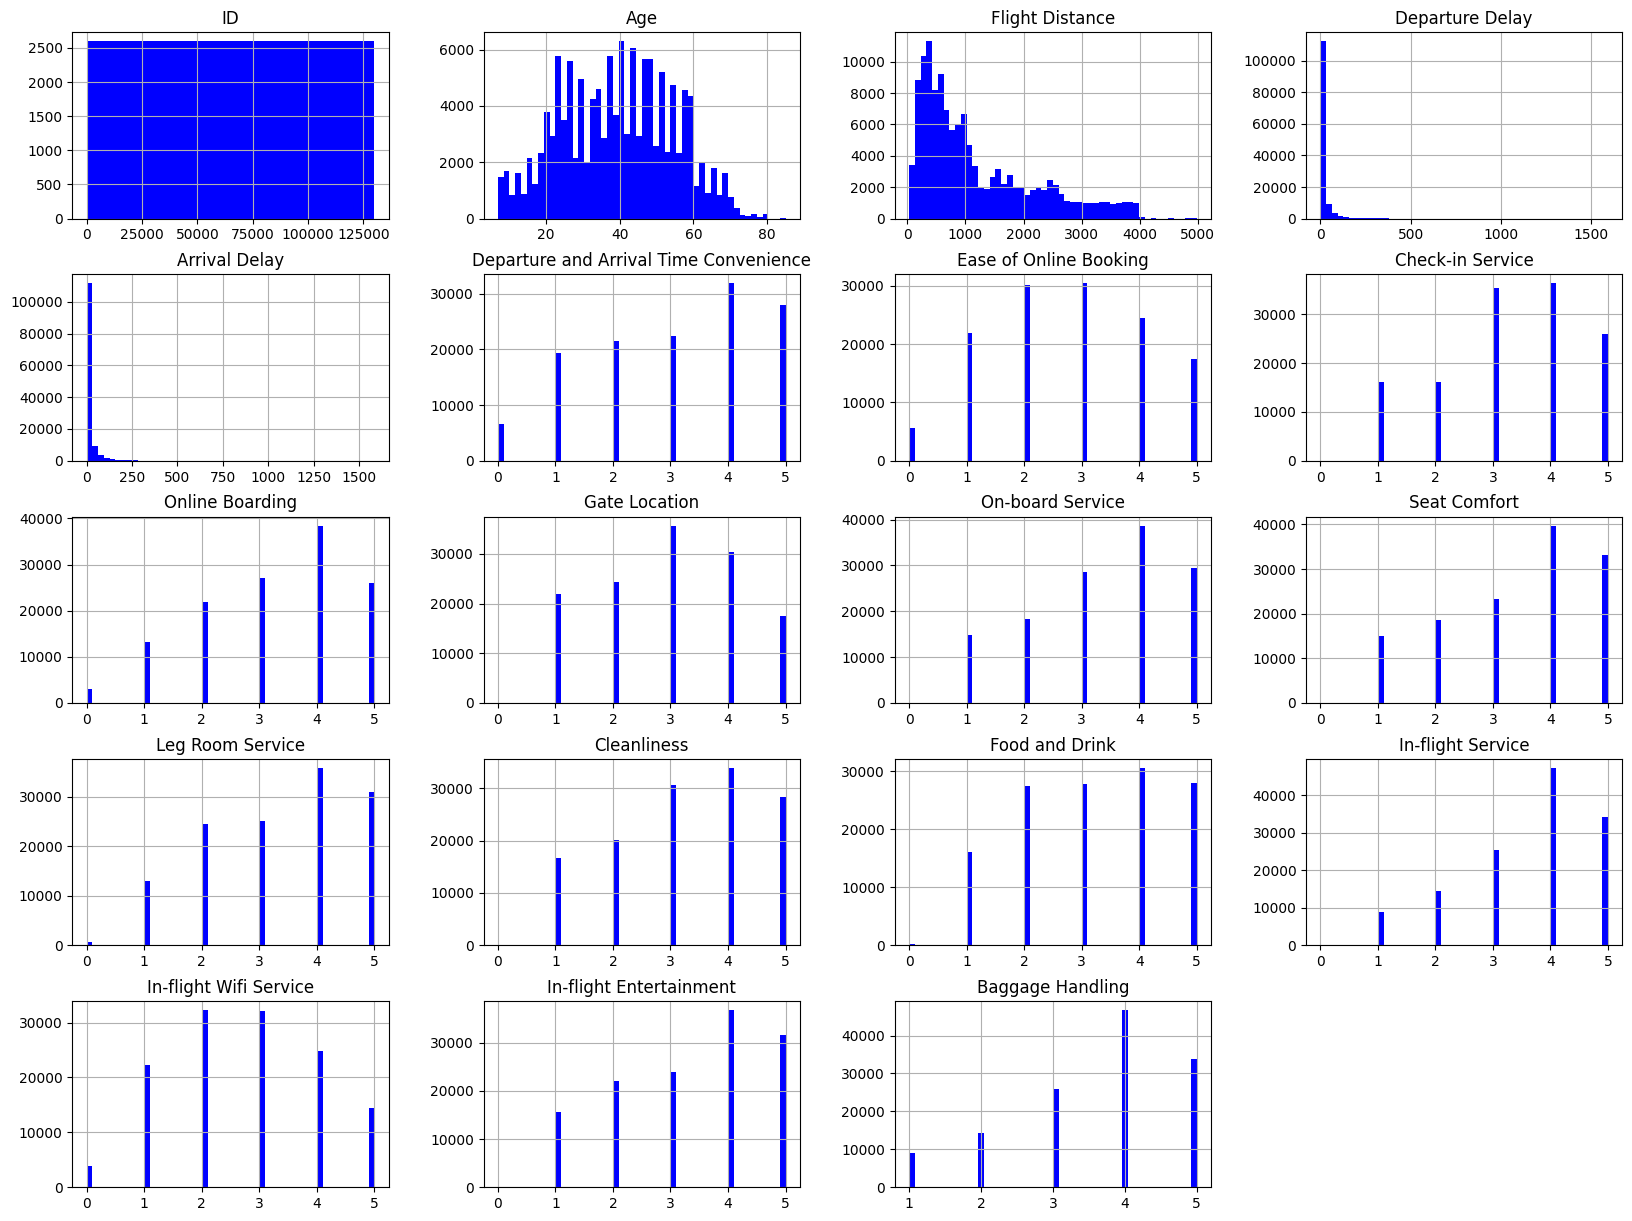

In [2]:
df.hist(bins=50, figsize=(20,15), color='blue')

TypeError: range indices must be integers or slices, not str

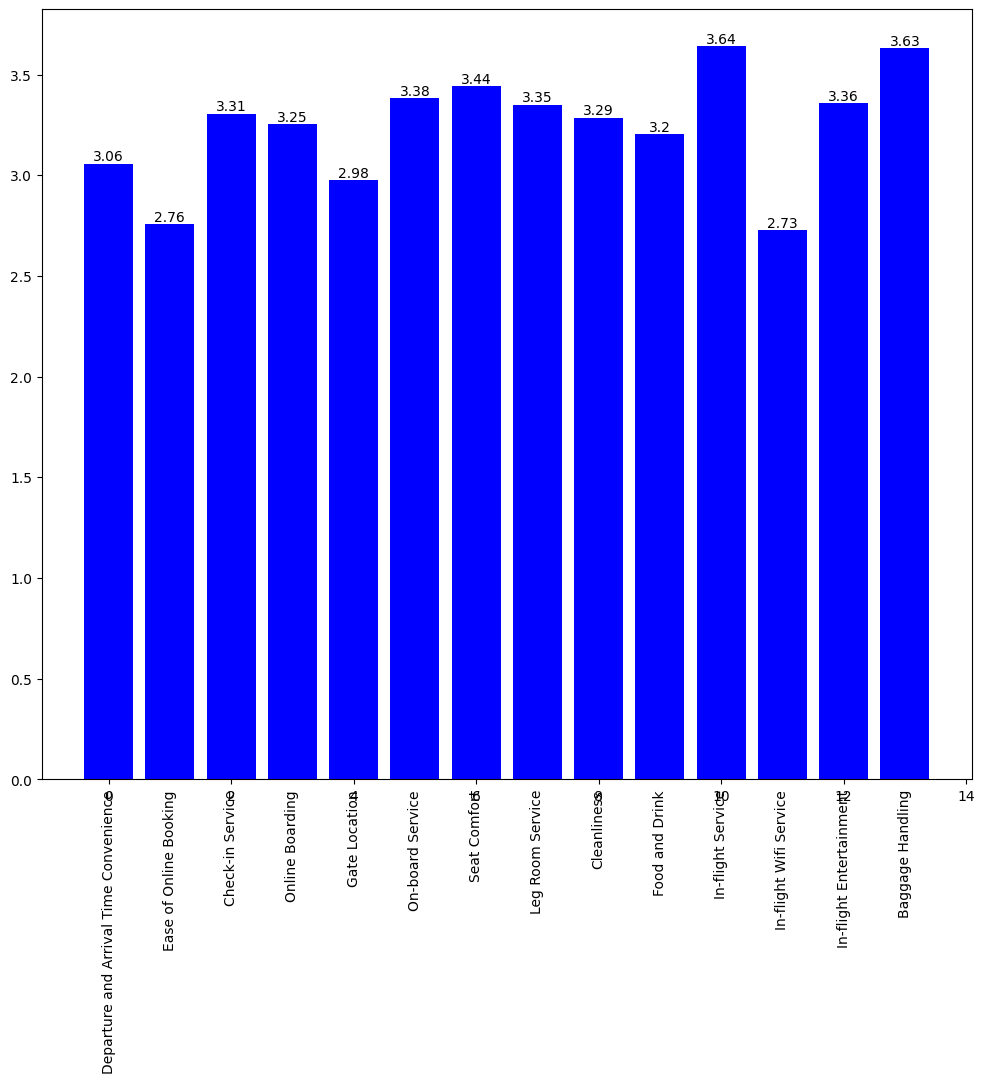

In [3]:
# Список процессов для анализа
processes = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

# Вычисление среднего значения каждого процесса
mean_scores = df[processes].mean()

# Создание activity-схемы
fig, ax = plt.subplots(figsize=(12, 10))  # Увеличиваем вертикальный размер графика

# Расположение столбцов
x_pos = range(len(processes))
bars = ax.bar(x_pos, mean_scores, color='blue')

# Добавление значений над столбцами
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

# Добавление названий процессов на столбцах
for i, process in enumerate(processes):
    ax.text(i, -0.05, process, ha='center', va='top', rotation='vertical')

# Определение самого уязвимого процесса
weakest_process = mean_scores.idxmin()
ax.axvline(x=x_pos[weakest_process], color='red', linestyle='--', label='Самый уязвимый процесс: ' + weakest_process)
ax.legend()

# Определение уровня удовлетворенности
satisfaction_levels = df['Satisfaction'].unique()
satisfaction_counts = df['Satisfaction'].value_counts().reindex(satisfaction_levels)
ax2 = ax.twinx()
ax2.plot(satisfaction_levels, satisfaction_counts, color='green', marker='o')
ax2.set_ylabel('Количество')
ax2.set_ylim(0, satisfaction_counts.max() + 20)
ax2.set_title('Уровень удовлетворенности')

# Настройка осей и названий
ax.set_xlabel('Процессы')
ax.set_ylabel('Среднее значение')
ax.set_title('Средняя оценка по процессам')

# Позиции и названия процессов на оси X
plt.xticks(x_pos, processes, rotation='vertical', ha='center')

# Отображение графика
plt.tight_layout()
plt.show()

Самый уязвимый процесс - In-flight Wifi Service

Посмотрим на уровень удовлетворенности для всех процессов

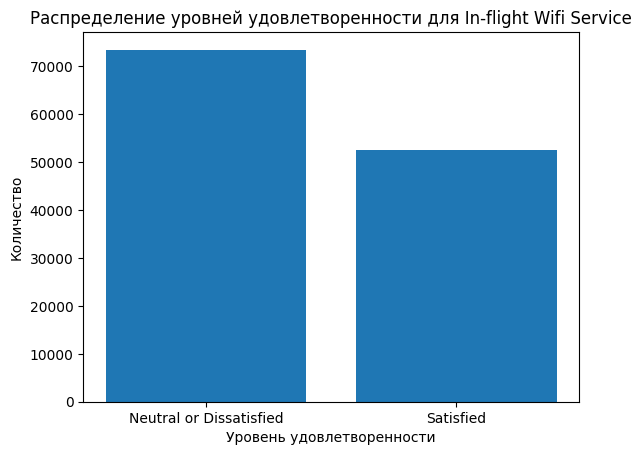

In [ ]:
# Фильтрация данных только для процесса 'In-flight Wifi Service'
wifi_service_df = df[df['In-flight Wifi Service'] >= 1]  # Здесь 1 - минимальная оценка для удовлетворительного уровня

# Распределение уровней удовлетворенности для процесса 'In-flight Wifi Service'
satisfaction_counts = wifi_service_df['Satisfaction'].value_counts().sort_index()

# Создание графика распределения уровней удовлетворенности
fig, ax = plt.subplots()
ax.bar(satisfaction_counts.index, satisfaction_counts.values)
ax.set_xlabel('Уровень удовлетворенности')
ax.set_ylabel('Количество')
ax.set_title('Распределение уровней удовлетворенности для In-flight Wifi Service')

plt.show()

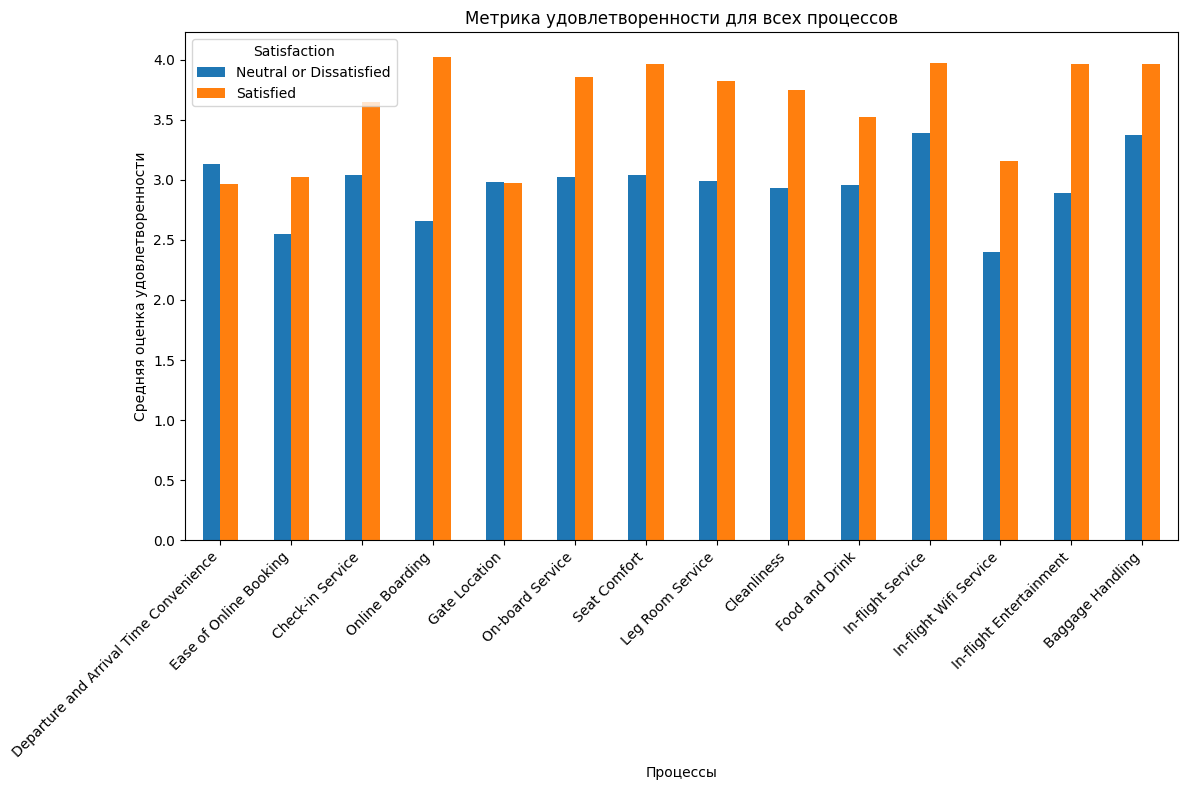

In [ ]:
# Список процессов для анализа
processes = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

# Создание сводной таблицы средних значений удовлетворенности по процессам
satisfaction_by_process = df.groupby('Satisfaction')[processes].mean().transpose()

# Создание графика метрики удовлетворенности для всех процессов
fig, ax = plt.subplots(figsize=(12, 8))
satisfaction_by_process.plot(kind='bar', ax=ax)

# Настройка осей и названий
ax.set_xlabel('Процессы')
ax.set_ylabel('Средняя оценка удовлетворенности')
ax.set_title('Метрика удовлетворенности для всех процессов')

# Поворот и размещение названий процессов на оси X
plt.xticks(rotation=45, ha='right')

# Отображение графика
plt.tight_layout()
plt.show()

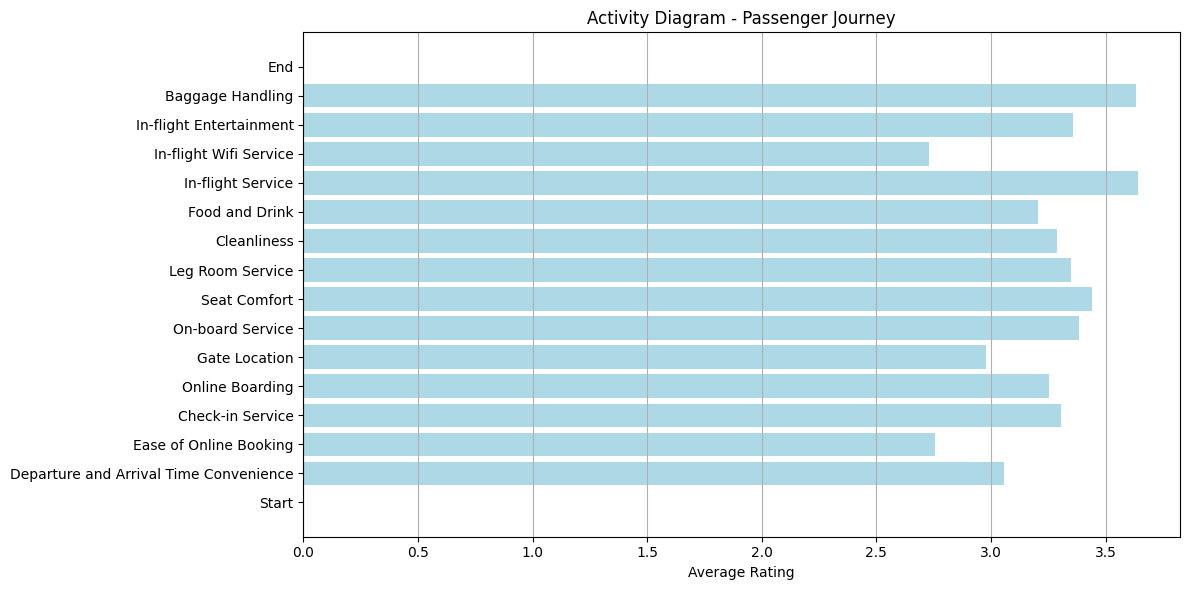

In [ ]:
# Define the processes based on the columns of interest
processes = ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

# Calculate the average ratings for each process
avg_ratings = df[processes].mean()

# Define the start and end processes
start_process = 'Start'
end_process = 'End'

# Create a list of processes including the start and end processes
all_processes = [start_process] + processes + [end_process]

# Create a list of average ratings including zero for the start and end processes
all_ratings = [0] + avg_ratings.tolist() + [0]

# Plot the activity diagram
plt.figure(figsize=(12, 6))
plt.barh(all_processes, all_ratings, color='lightblue')
plt.xlabel('Average Rating')
plt.title('Activity Diagram - Passenger Journey')
plt.grid(axis='x')
plt.tight_layout()
plt.show()